# Morris_Lecar_1981

code source: https://brian2.readthedocs.io/en/stable/examples/frompapers.Morris_Lecar_1981.html

paper: https://pubmed.ncbi.nlm.nih.gov/7260316/

In [1]:
from brian2 import *

def MorrisLecar1981(integrator):

    set_device('cpp_standalone')
    defaultclock.dt = 0.01*ms

    g_L = 2*mS
    g_Ca = 4*mS
    g_K = 8*mS
    V_L = -50*mV
    V_Ca = 100*mV
    V_K = -70*mV
    lambda_n__max = 1.0/(15*ms)
    V_1 = 10*mV
    V_2 = 15*mV  # Note that Figure caption says -15 which seems to be a typo
    V_3 = -1*mV
    V_4 = 14.5*mV
    C = 20*uF


    # V,N-reduced system (Eq. 9 in article), note that the variables M and N (and lambda_N, etc.)
    # have been renamed to m and n to better match the Hodgkin-Huxley convention, and because N has
    # a reserved meaning in Brian (number of neurons)
    eqs = '''
    dV/dt = (-g_L*(V - V_L) - g_Ca*m_inf*(V - V_Ca) - g_K*n*(V - V_K) + I)/C : volt
    dn/dt = lambda_n*(n_inf - n) : 1
    m_inf = 0.5*(1 + tanh((V - V_1)/V_2)) : 1
    n_inf = 0.5*(1 + tanh((V - V_3)/V_4)) : 1
    lambda_n = lambda_n__max*cosh((V - V_3)/(2*V_4)) : Hz
    I : amp
    '''

    neuron = NeuronGroup(17, eqs, method=integrator)
    neuron.I = (np.arange(17)*25+100)*uA
    neuron.V = V_L
    neuron.n = 'n_inf'
    mon = StateMonitor(neuron, ['V', 'n'], record=True)

    run_time = 220*ms
    run(run_time)
    fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'right': 0.95, 'bottom': 0.15},
                                   figsize=(6.4, 3.2))
    fig.subplots_adjust(wspace=0.4)
    for line_no, idx in enumerate([0, 4, 12, 15]):
        color = 'C%d' % line_no
        ax1.plot(mon.t/ms, mon.V[idx]/mV, color=color)
        ax1.text(225, mon.V[idx][-1]/mV, '%.0f' % (neuron.I[idx]/uA), color=color)
    ax1.set(xlim=(0, 220), ylim=(-50, 50), xlabel='time (ms)')
    ax1.set_ylabel('V (mV)', rotation=0)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    # dV/dt nullclines
    V = linspace(-50, 50, 100)*mV
    for line_no, (idx, color) in enumerate([(0, 'C0'), (4, 'C1'), (8, 'C4'), (12, 'C2'), (16, 'C5')]):
        n_null = (g_L*(V - V_L) + g_Ca*0.5*(1 + tanh((V - V_1)/V_2))*(V - V_Ca) - neuron.I[idx])/(-g_K*(V - V_K))
        ax2.plot(V/mV, n_null, color=color)
        ax2.text(V[20+5*line_no]/mV, n_null[20+5*line_no]+0.01, '%.0f' % (neuron.I[idx]/uA), color=color)
    # dn/dt nullcline
    n_null = 0.5*(1 + tanh((V - V_3)/V_4))
    ax2.plot(V/mV, n_null, color='k')
    ax2.set(xlim=(-50, 50), ylim=(0, 1), xlabel='V (mV)')
    ax2.set_ylabel('n', rotation=0)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    plt.show()
    

euler


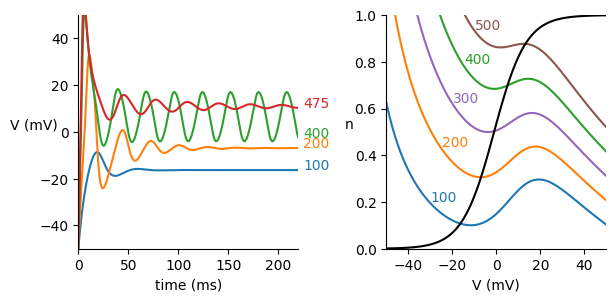

In [2]:
integrators=[#'exact', 
             #'exponential_euler', 
             'euler', 
             #'rk2', 
             #'rk4', 
             #'heun', 
             #'milstein'
]
for integrator in integrators:
    print(integrator)
    MorrisLecar1981(integrator)